# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [5]:
df.gender.value_counts()

F    65
M    65
Name: gender, dtype: int64

There are a total of 130 observations which are evenly split between M and F genders

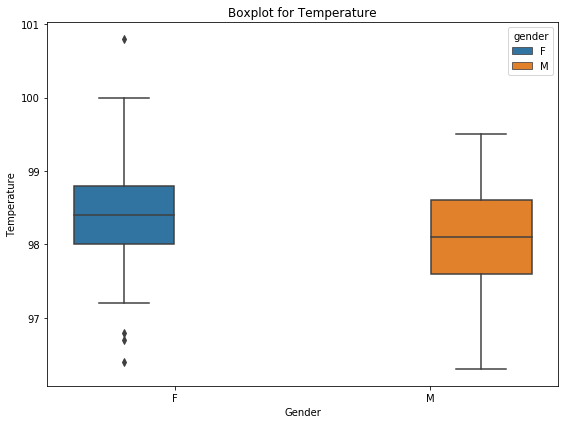

In [6]:
_ = plt.figure(figsize=(8,6))
_ = sns.boxplot(x = 'gender', y = 'temperature', hue='gender', data=df)
_ = plt.title('Boxplot for Temperature')
_ = plt.xlabel('Gender')
_ = plt.ylabel('Temperature')
plt.tight_layout()
plt.show()

Above boxplot of Male and Female temperatures indicate higher median of females compared to males.

# 1. Is the distribution of body temperatures normal?

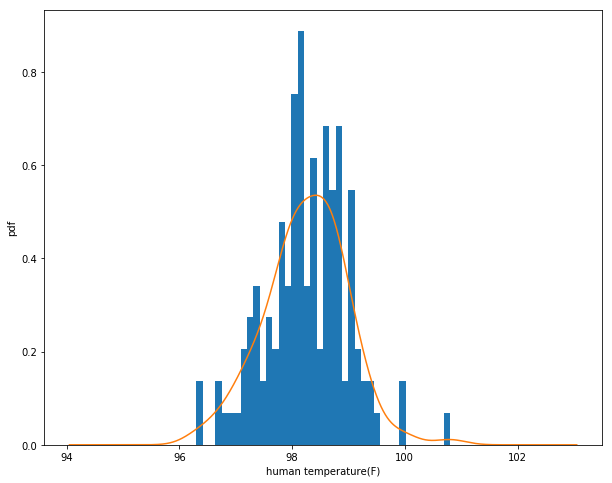

In [7]:
_ = plt.figure(figsize=(10,8))
_ =plt.hist(df.temperature, bins=40, density = True)
_ =df.temperature.plot(kind='kde')
_ =plt.xlabel('human temperature(F)')
_ =plt.ylabel('pdf')
plt.show()

Above histogram follow a normal Bell curve indicating that the distribution of the temperature of females and males is approximately normal. 

# 2. Is the sample size large? Are the observations independent?

In [8]:
print('Length of data:  ', len(df))

Length of data:   130


The total number of observations in given dataset is 130. As per the Central Limit Theorem the sample size of 30 or more is considered as large so the sample size of this dataset is large. 

Each temperature of a female and amale from the dataset can be considered as independent of each other as there is no indication of their dependency.

# 3. Is the true population mean really 98.6 degrees F?

### i) Bootstrap Hypothesis test

Null hypothesis Ho: The population mean temperature is 98.6F 

Alternate hypotheses Ha: The population mean temperature is differnt than 98.6F

In [9]:
#Create a function to draw the boot-strap samples
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))
def draw_bs_reps(data, func, size=1):
    
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [10]:
temp_np_array = np.asarray(df.temperature)
bs_replicates  = draw_bs_reps(temp_np_array, np.mean, 10000)# Compute the confidence interval
conf_int = np.percentile(bs_replicates,[2.5, 97.5])
# Print the confidence interval
print('95% confidence interval =', conf_int)

95% confidence interval = [98.12615385 98.37615385]


We can reject the null hypothesis claim that mean Human temperature is 98.6.

In [11]:
#compute p_value
p = (np.sum(bs_replicates  > 98.6)) / len(bs_replicates)
# Print the p-value
print('p = ', p)

p =  0.0


Since the p-value is smaller, it is certain that the null hypothesis can be rejected. 

## ii) frequentist statistical test

frequentist statistical test can be carried out with t-test as below.

## iii)  Would you use a one-sample or two-sample test? Why?

A one sample t-test is used to compare the mean of a sample to a known value (often  0, but not always).

Whereas, a two sample t test is used to compare the means of two different samples.

Therefore, for the estimation of mean Human temperature, 1-sample test should be used.

In [12]:
# One sample test 
# Null hypothesis :The true mean is 98.6
# t-test 
sample_mean = np.mean(temp_np_array) 
sample_std  = np.std(temp_np_array)
sample_size = len(temp_np_array)
population_mean = 98.6
t_statistic = (sample_mean - population_mean) \
                * np.sqrt(sample_size)\
                /df.temperature.std()

from scipy import stats
# Multiply by two for the two tailed test
t_result =2* stats.norm.cdf(t_statistic)

print( 't_statistic:',t_result)

t_statistic: 4.902157014101181e-08


In [13]:
# To conduct a z test we assume the population std is the same as the sample std
population_std = df.temperature.std()
z_statistic = (sample_mean - population_mean) \
                * np.sqrt(sample_size)\
                /df.temperature.std()

z_result = 2* stats.norm.cdf(t_statistic)
print('z statistic:', z_result)

z statistic: 4.902157014101181e-08


Since this is significantly under 0.05, we reject the null hypothesis that the true mean is 98.6

## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

Which one is the correct one to use? What do you notice? What does this tell you about the difference in application of the tt and zz statistic?

In [14]:
# Randomly select a size 10 array: 
small_temp = np.random.choice(temp_np_array, size=10, replace=True)
    
# Make an array of translated temperatures
small_translated_temps = small_temp - np.mean(small_temp) + 98.6

# Take bootstrap replicates of body temperatures
small_temp_replicates = draw_bs_reps(small_translated_temps, np.mean, 10000)

# Compute p_value
p = np.sum(small_temp_replicates <= np.mean(small_translated_temps)) / 10000

# print p_value
print('p = ', p)

p =  0.522


Since the p value is > 0.05 we fail to reject the null hypothesis

In [15]:
# t-test work 
sample_mean = np.mean(small_temp) 
sample_std  = np.std(small_temp)
sample_size = len(small_temp)
polupation_mean = 98.6
t_statistic = (sample_mean - population_mean) \
                * np.sqrt(sample_size)\
                /sample_std

from scipy import stats
# Multiply by two for the two tailed test
t_result =2* stats.norm.cdf(t_statistic)

print( 't_statistic:',t_result)

t_statistic: 0.5790431286444069


In [16]:
population_std = df.temperature.std()
z_statistic = (sample_mean - population_mean) \
                * np.sqrt(sample_size)\
                /df.temperature.std()

z_result = 2* stats.norm.cdf(t_statistic)
print('z statistic:', z_result)

z statistic: 0.5790431286444069


## 5. At what temperature should we consider someone's temperature to be "abnormal"?

In [17]:
temp_np_array = np.asarray(df.temperature)
bs_replicates  = draw_bs_reps(temp_np_array, np.mean, 10000)# Compute the confidence interval
conf_int = np.percentile(bs_replicates,[2.5, 97.5])
# Print the confidence interval
print('95% confidence interval =', conf_int)

95% confidence interval = [98.12461538 98.37692308]


Values outside of the range:  [ 98.12153846,   98.37461538]  are considered abnormal

## 6. Is there a significant difference between males and females in normal temperature?

To verify if there is any significant difference between males and females in a normal temperature, we will plot a swarmplot to study the distribution.

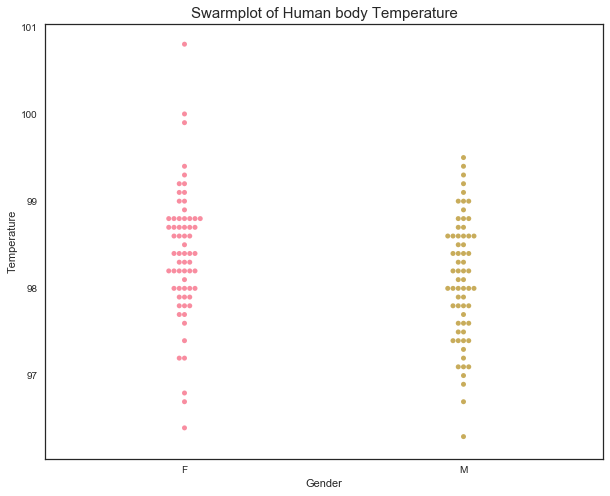

In [18]:
# Generate a swarm plot of Male and Female average body temperatures.
sns.set(style="white")
_ = plt.figure(figsize=(10,8))
with sns.color_palette("husl"):
 sns.swarmplot(y="temperature", x="gender", alpha=0.8, data =df)
_ = plt.title('Swarm Plot of Human Body Temperature for Men and Women')
_ = plt.xlabel('Gender')
_ = plt.ylabel('Temperature')
_ = plt.title('Swarmplot of Human body Temperature', fontsize=15)
plt.show() 

The swarm plot indicates that male and female temperature distributions are slightly different.
We will test this with Null hypothesis: male and female temperature distributions have the same mean.

In [19]:
# Separate df in MaleTemp and FemaleTemp
femaleTemp = df['temperature'].loc[df['gender'] == 'F']
maleTemp   = df['temperature'].loc[df['gender'] == 'M']

temp_mean_diff = np.mean(femaleTemp) - np.mean(maleTemp)

temp_concat = np.concatenate((femaleTemp, maleTemp))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(temp_concat, size=len(temp_concat))
    
    # Compute replicate
    bs_replicates[i] = np.mean(bs_sample[:len(femaleTemp)]) - np.mean(
                                     bs_sample[len(maleTemp):])

# Compute p_value
p = np.sum(bs_replicates >= temp_mean_diff) / len(bs_replicates)

# Print p_value
print('p-value =', p)


p-value = 0.0111


Since p_value < 0.05, we can reject the null hypothesis and claim that male and female temp. have different mean.